**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Read Datasets**

In [2]:
df= pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/CustomerSpendingScore.csv')

In [3]:
df.head()

,Sex,Gender,Age,"Annual Income(1,000s)",Spending Score (1-100)
0,Male,0,19,15000,39
1,Male,0,21,15000,81
2,Female,1,20,16000,6
3,Female,1,23,16000,77
4,Female,1,31,17000,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Sex                     200 non-null    object
 1   Gender                  200 non-null    int64 
 2   Age                     200 non-null    int64 
 3   Annual Income(1,000s)   200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.columns

Index(['Sex', 'Gender', 'Age', 'Annual Income(1,000s)',
       'Spending Score (1-100)'],
      dtype='object')

**Select Input Variables**

In [8]:
df.columns

Index(['Sex', 'Gender', 'Age', 'Annual Income(1,000s)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
X= df[['Gender', 'Age', 'Annual Income(1,000s)',
       'Spending Score (1-100)']]

**Scaling**

In [10]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [11]:
X_scaled = ss.fit_transform(X)

In [13]:
pd.DataFrame(X_scaled).describe()

,0,1,2,3
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,-7.549517e-17,-1.021405e-16,-1.421085e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.128152e+00,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-1.128152e+00,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,8.864053e-01,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,8.864053e-01,7.284319e-01,6.656748e-01,8.851316e-01
max,8.864053e-01,2.235532e+00,2.917671e+00,1.894492e+00


In [14]:
from sklearn.cluster import KMeans

In [15]:
km= KMeans(n_clusters=3)
km.fit(X_scaled)
km.predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1, 2, 0, 1,
       1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 1, 0, 2, 2, 2,
       2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1], dtype=int32)

In [16]:
import warnings
warnings.filterwarnings("ignore")

**To Find the Cluster: to see where our error is Minimum**

y= wcss ( Within cluster sum of square)

In [19]:
wcss = []

for i in range(1,20):
  km= KMeans(n_clusters=i)
  km.fit(X_scaled)
  wcss.append(km.inertia_)



In [20]:
wcss

[800.0000000000001,
 588.8026767824938,
 476.7732065607644,
 388.7654342841472,
 325.68279040738923,
 275.8588431130499,
 237.2692758495486,
 199.71662559667672,
 174.18800022186804,
 152.0867629871069,
 137.2550975711607,
 125.35656763172821,
 114.36975653488781,
 115.2435964862134,
 98.84403600798635,
 95.59348781755776,
 90.99152052950879,
 83.98960243816632,
 79.60985366743284]

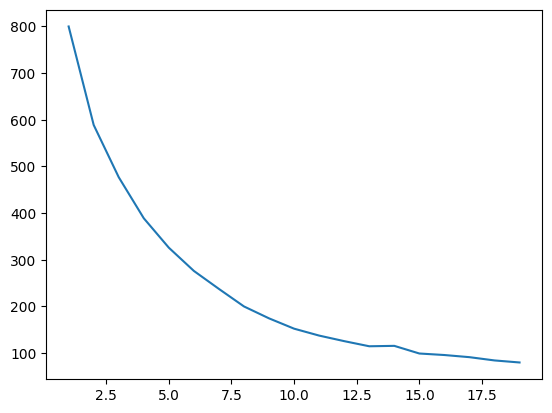

In [22]:
plt.plot(range(1,20), wcss)

In [23]:
wcss = []

for i in range(1,20):
  km= KMeans(n_clusters=i)
  km.fit(X)
  wcss.append(km.inertia_)

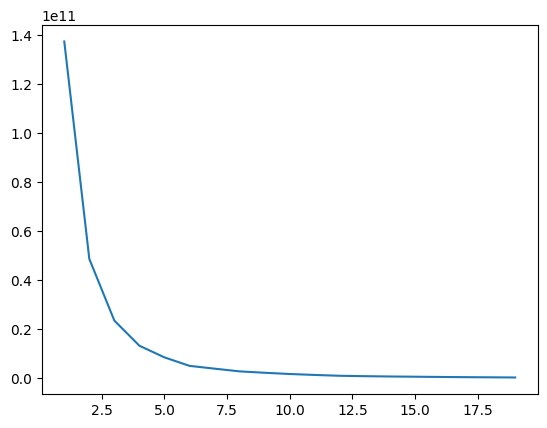

In [24]:
plt.plot(range(1,20), wcss)